# CompassApp Result Anaylsis Deepdive
In this example we will look into various ways you can anaylize the result from a CompassApp query. This example is intenteded to be more of a deepdive into CompassApp result anaylsis, a beginners guide can be found in open_street_maps_example

In [1]:
from nrel.routee.compass import CompassApp

In [2]:
# run if you don't have a folder of cached data of Pittsburgh PA
app = CompassApp.from_place("Pittsburgh, Pennsylvania, USA", cache_dir="pittsburgh_pa", add_grade=True)

processing graph topology and speeds
adding grade information
processing vertices
processing edges
writing vertex files
writing edge files
writing edge attribute files
copying default configuration TOML files
copying RouteE Powertrain models


In [2]:
# run if you already have a Pittsburgh PA folder
app = CompassApp.from_config_file("pittsburgh_pa/osm_default_energy.toml")

In [3]:
query = [
    {
        "origin_x": -80.052196,
        "origin_y": 40.432366,
        "destination_x": -79.949288,
        "destination_y": 40.465854,
        "model_name": "2016_Leaf_24_kWh",
        "vehicle_rates": {
            "distance": {"type": "factor", "factor": 0.655},
            "time": {"type": "factor", "factor": 0.33},
            "energy_electric": {"type": "factor", "factor": .50},            
        },
        "grid_search": {
            "test_cases": [
              {
                "name": "least_time",
                "weights": {
                  "distance": 0,
                  "time": 1,
                  "energy_electric": 0
                }
              },
              {
                "name": "least_energy",
                "weights": {
                  "distance": 0,
                  "time": 0,
                  "energy_electric": 1
                }
              },
              {
                "name": "least_cost",
                "weights": {
                  "distance": 1,
                  "time": 1,
                  "energy_electric": 1
                }
              }
            ]
          }    
    },
]

In [4]:
result = app.run(query)

## Geopandas
With `results_to_geopandas` you can covert the results in to a geopandas data frame. Which you then can use to do things like plot the results, or analyze specific columns.

In [12]:
from nrel.routee.compass.io.convert_results import results_to_geopandas
results_gdf = results_to_geopandas(result)

<Axes: >

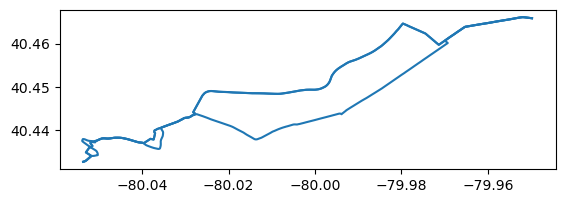

In [13]:
results_gdf.geometry.plot()

In [14]:
results_gdf[['route.traversal_summary.energy_electric', 'route.traversal_summary.time', 'route.traversal_summary.distance']]

,route.traversal_summary.energy_electric,route.traversal_summary.time,route.traversal_summary.distance
route_id,,,
0,1.750978,14.179026,7.140390
1,1.750978,14.179026,7.140390
2,1.664029,16.604102,7.317947


## Plot Routes
There are also functions in nrel.routee.compass.plot that plot the routes on a map

In [16]:
from nrel.routee.compass.plot import plot_routes_folium
plot_routes_folium(result)

## Epilogue
Congratulations for making it through the deep dive of CompassApp. Feel free to look at other examples